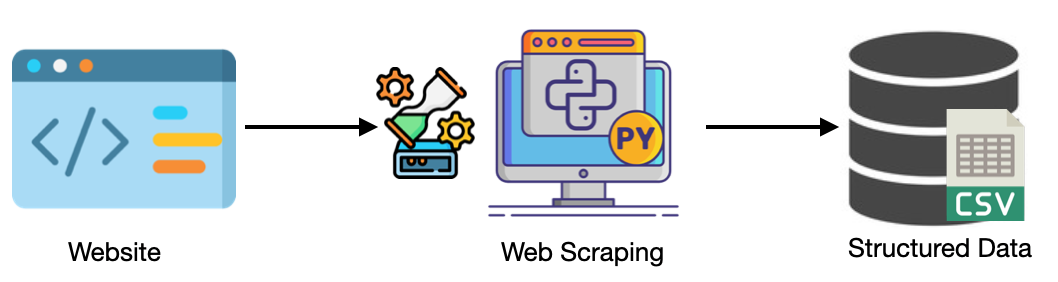

# Projeto Web Scraping


### Objetivo do Projeto:
      Esse projeto tem como objetivo uma análise exploratória de dados sobre meu histórico de aulas de inglês, na plataforma https://www.talkntalk.com.br/.
      
 
### O projeto seguiu os seguintes passos : 

    - Conectando a uma página da web
    - Analisando html usando BeautifulSoup
    - Percorrendo o objeto sopa para encontrar elementos
    - Gravando dados em um csv
    - Executando alguma limpeza de dados simples
    - Visualização de dados



##### O que é Web Scraping?

     O web scraping (raspagem de rede, em tradução livre), também conhecido como extração de dados da web, é o nome dado ao processo de coleta de dados estruturados da web de maneira automatizada. 

    Bibliotecas Usadas
    - Beautiful Soup
    - Selenium
    - Pandas
    - Matplotlib

# Libs


In [19]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.firefox.options import Options
from time import sleep

from bs4 import BeautifulSoup
import pandas as pd

import matplotlib.pyplot as plt

# WebScraping

In [3]:

# Passo 01 - Entrar no site 
options = Options()
options.binary_location = r'C:\Program Files\Mozilla Firefox\firefox.exe'
driver = webdriver.Firefox(executable_path=r"C:\chromedriver_win32\geckodriver.exe",options=options)
link = 'https://www.talkntalk.com.br/'
driver.get(url=link)
sleep (10)


#Passo 02 - Clickar no login
driver.find_element('id','comp-lah88g5y1').click()
driver.find_element('xpath','/html/body/div[1]/div/div[3]/div/header/div/div[2]/div[2]/div/div/div[3]/button').click()
sleep (4)


In [4]:
#Passo 03 - Inserir Login e Senha 
login = driver.find_element('xpath','//*[@id="input_comp-kp3bvoxe"]').send_keys('meuemail@gmail.com')
senha = driver.find_element('xpath','//*[@id="input_comp-kp3bvoy8"]').send_keys('****')
sleep (2)

buttonLogin =driver.find_element('xpath',
                   '/html/body/div[1]/div/div[4]/div/div/div[2]/div/div[2]/div/div/div[2]/div/div/form/div/div/div[7]/button/div').click()
sleep(3)

In [41]:
#Passo 04 - Acesso Área de Menbros
driver.get('https://www.talkntalk.com.br/account/my-bookings')

sleep(6)

# Acesso a frame 
driver.switch_to.frame(driver.find_element_by_xpath('/html/body/div[1]/div/div[3]/div/main/div/div/div/div[2]/div/div/div/div[1]/iframe'))

In [42]:
# Passo 05 - Acessar Dados Historicos de Aulas
acessoHitorico =driver.find_element('xpath','/html/body/div/div/div/div[2]/nav/ul/li[2]').click()



In [49]:
buttons=driver.find_elements(By.CLASS_NAME,'vEB8V')

for button in buttons:
    button.click()


In [54]:
tabelabruta = driver.find_element_by_xpath('/html/body/div/div/div/div[2]/div/div/div/div')
tabelaempilhada = tabelabruta.text


In [59]:

# Passo 06 - Manipulção dos Dados 

historicoAulas = BeautifulSoup(tabelaempilhada,'html.parser')
results = tabelabruta.text.split('\n')
count = 1
data = []
aula = []
professor = []

for r in results:
    if count == 1:
        data.append(r)
        count += 1
    elif count == 2:
        aula.append(r)
        count += 1
    elif count == 5:
        professor.append(r)
        count = 1
    else:
        count += 1

In [61]:
df=pd.DataFrame(list(zip(data, aula, professor)), columns=['Data', 'Tipo Aula', 'Professor'])

# Checkpoint 

In [18]:
df.to_csv("aulas.csv",encoding="UTF-8", sep=";")

# Data Set


In [2]:
# Gravando dados em um csv
df = pd.read_csv('aulas.csv', sep=';', index_col=0)


# Tratamento da Base de Dados 

In [4]:
df.dtypes

Data         object
Tipo Aula    object
Professor    object
dtype: object

In [5]:

df.head()

,Data,Tipo Aula,Professor
0,"6 de fevereiro de 2023, 11:00",Inglês para Intermediários,Com Giovanna Viglio Instrutora
1,"4 de fevereiro de 2023, 12:00",1ª TURMA DE MENTORIA,Com Phillipe Soares
2,"3 de fevereiro de 2023, 11:00",Inglês para Iniciantes,Com Sara Conceição Iniciantes
3,"3 de fevereiro de 2023, 10:00",Inglês para Iniciantes,Com Giovanna Viglio Iniciante
4,"2 de fevereiro de 2023, 21:00",Inglês para Intermediários,Com Bruna Marola Instrutora


In [6]:
df[["Data","Hora"]]=df["Data"].str.split(",", expand=True)

In [7]:
#Retirar a palavra em algumas colunas
df["Professor"]=df["Professor"].str.replace("Com", "").str.replace("Iniciantes", "").str.replace("Iniciante", "").str.replace("Instrutora", "").str.replace("Business", "").str.replace("Instrutor", "")
df["Tipo Aula"]=df["Tipo Aula"].str.replace("TALKNTALK para Mulheres", "Imersão em Inglês").str.replace("Business English", "Imersão em Inglês")
df["Data"]=df["Data"].str.replace(" de ","/").str.replace("janeiro","01").str.replace("fevereiro","02")

In [8]:

df['Tempo Aulas']=60
df['Qtd Aulas']=1

In [9]:
df["Data"] =pd.to_datetime(df["Data"], format='%d/%m/%Y')


In [10]:
df.dtypes

Data           datetime64[ns]
Tipo Aula              object
Professor              object
Hora                   object
Tempo Aulas             int64
Qtd Aulas               int64
dtype: object

In [11]:

df.head(5)

,Data,Tipo Aula,Professor,Hora,Tempo Aulas,Qtd Aulas
0,2023-02-06,Inglês para Intermediários,Giovanna Viglio,11:00,60,1
1,2023-02-04,1ª TURMA DE MENTORIA,Phillipe Soares,12:00,60,1
2,2023-02-03,Inglês para Iniciantes,Sara Conceição,11:00,60,1
3,2023-02-03,Inglês para Iniciantes,Giovanna Viglio,10:00,60,1
4,2023-02-02,Inglês para Intermediários,Bruna Marola,21:00,60,1


# Data Visualization


* Quantidade de Aulas Assistidadas e Quantos minutos.

In [12]:

df["Qtd Aulas"].sum()

50

In [13]:
df["Tempo Aulas"].sum()

3000

In [14]:
# Quantidade de aula por Mês e Tipo de Aula
df.groupby([df["Data"].dt.month,"Tipo Aula"])["Qtd Aulas"].sum()

Data  Tipo Aula                 
1     Francês para Iniciantes        1
      Imersão em Inglês             10
      Inglês para Iniciantes        25
      Inglês para Intermediários     7
2     1ª TURMA DE MENTORIA           1
      Inglês para Iniciantes         3
      Inglês para Intermediários     3
Name: Qtd Aulas, dtype: int64

Text(0, 0.5, 'Tipo de Aula')

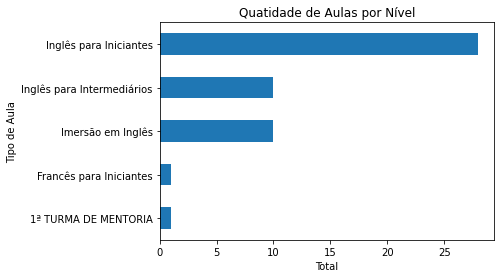

In [17]:
df.groupby("Tipo Aula")["Qtd Aulas"].sum().sort_values(ascending=True).plot.barh(title="Quatidade de Aulas por Nível")
plt.xlabel("Total")
plt.ylabel("Tipo de Aula")


Professor
 Giovanna Viglio     15
 Sara Conceição      13
 Bruna Carreta        4
 Bruna Marola         4
 Phillipe Soares      4
 Yasmin Santana       2
 Duda Cavalcanti      1
 Gabriel Henrique     1
 Gabriela Bonaldi     1
 Júnio Rufino         1
 Luana Dias           1
 Sarah Romanhol       1
 Vanessa Bento        1
 Yuri Reis            1
Name: Qtd Aulas, dtype: int64


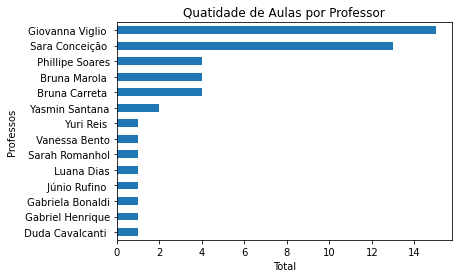

In [16]:
df.groupby("Professor")["Qtd Aulas"].sum().sort_values(ascending=True).plot.barh(title="Quatidade de Aulas por Professor")
plt.xlabel("Total")
plt.ylabel("Professos")

print(df.groupby("Professor")["Qtd Aulas"].sum().sort_values(ascending=False))

# Conclusão

- Estou praticando uma grande quandidade de aulas no plataforma no nível iniciante, mas tenho estou iniciando uma crescendo evolução no nível intermediário e nas imerssões. 

- Tenhp uma maior qantidade de aulas com as professoras Giovanna e Sara.

- Foi feito uma aula de frânces mais sem outros registros.

- Quantidade de dados muito pequena pra fazer previsões.


